In [590]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assemble the Data
Create `training_set` by combining features and label datasets. Display the first 5 data points.

In [494]:
x = pd.read_csv('training_set_values.csv')
y = pd.read_csv('training_set_labels.csv')
training_set = pd.merge(x, y, on = x['id'])
training_set = training_set.drop(['id_x', 'id_y'], axis = 1).rename(columns = {'key_0': 'id'})
training_set.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Make a copy of `training_set` (named as `play_set`) so the original data is intact. Sample 50% of the `play_set` for data exploration. Display the first 5 data points.

In [515]:
play_set = training_set.copy()
play_set_sample = play_set.sample(frac = 0.5, replace = True, random_state = 42)
play_set_sample.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
56422,23812,0.0,2013-02-24,Government Of Tanzania,1290,District council,37.626401,-3.211457,Kwa Nicholaus Kimario,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe,non functional
15795,49444,0.0,2012-10-31,Rwssp,0,WEDECO,34.316586,-3.107161,Muungano,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
860,35778,0.0,2011-03-13,Omar Ally,-13,Omar Ally,38.974416,-5.420823,Kwa Omar Ally,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,non functional
38158,11980,1000.0,2011-03-10,Danida,1743,DANID,34.531524,-9.769604,none,0,...,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
54343,68525,1000.0,2011-03-20,Dhv,327,DWE,36.367112,-8.774761,Kwa Mbayambaya,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional


# Data Exploration
Quick view of each feature's number of data point and type.

In [496]:
play_set_sample.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29700 entries, 56422 to 8890
Data columns (total 41 columns):
id                       29700 non-null int64
amount_tsh               29700 non-null float64
date_recorded            29700 non-null object
funder                   27856 non-null object
gps_height               29700 non-null int64
installer                27842 non-null object
longitude                29700 non-null float64
latitude                 29700 non-null float64
wpt_name                 29700 non-null object
num_private              29700 non-null int64
basin                    29700 non-null object
subvillage               29501 non-null object
region                   29700 non-null object
region_code              29700 non-null int64
district_code            29700 non-null int64
lga                      29700 non-null object
ward                     29700 non-null object
population               29700 non-null int64
public_meeting           28034 non-null objec

Descriptive statistics for numeric features, several insights listed as below<br>
- `amount_tsh`: Most of the wells do not produce water. For those do, the variance of the amount is huge.
- `num_private`: Not clear what the feature means (no documentation). Discard for model building.
- `construction_year`: 0 as year doesn't make sense. Very likely they are missing data but recoded as 0.

In [497]:
play_set_sample.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,29700.000000,29700.000000,29700.000000,29700.000000,2.970000e+04,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000
mean,37071.397441,312.616379,668.065589,34.163597,-5.722381e+00,0.469495,15.363535,5.675623,182.006128,1305.579293
std,21491.704653,3065.918307,692.594366,6.368827,2.929651e+00,12.786065,17.741599,9.721893,456.207717,950.104242
min,6.000000,0.000000,-63.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18459.750000,0.000000,0.000000,33.075891,-8.541806e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,36889.000000,0.000000,365.000000,34.931740,-5.034261e+00,0.000000,12.000000,3.000000,27.000000,1986.000000
75%,55781.000000,20.000000,1321.000000,37.191022,-3.326646e+00,0.000000,17.000000,5.000000,225.000000,2004.000000
max,74247.000000,250000.000000,2770.000000,40.344301,-2.000000e-08,1776.000000,99.000000,80.000000,15300.000000,2013.000000


Percentage of missing data for each feature, several features need extra attention:<br>
- `funder`: 3.818754141815772
- `installer`: 3.847746852220013
- `subvillage`: 0.41211066931742873
- `public_meeting`: 3.4501325381047057
- `scheme_management`: 4.027915838303512
- `permit`: 3.16227634194831

All these features are categorical. Missing data will be handled by imputing the most frequent value of each feature. 

In [498]:
print ('Missing Data Percentage')
for c in data:
    print(c, ':', (play_set_sample[c].isna().sum()/len(data))*100)

Missing Data Percentage
id : 0.0
amount_tsh : 0.0
funder : 3.818754141815772
gps_height : 0.0
installer : 3.847746852220013
longitude : 0.0
latitude : 0.0
basin : 0.0
subvillage : 0.41211066931742873
region : 0.0
region_code : 0.0
district_code : 0.0
lga : 0.0
ward : 0.0
population : 0.0
public_meeting : 3.4501325381047057
scheme_management : 4.027915838303512
permit : 3.16227634194831
construction_year : 0.0
extraction_type : 0.0
extraction_type_group : 0.0
extraction_type_class : 0.0
management : 0.0
management_group : 0.0
payment : 0.0
payment_type : 0.0
water_quality : 0.0
quality_group : 0.0
quantity : 0.0
quantity_group : 0.0
source : 0.0
source_type : 0.0
source_class : 0.0
waterpoint_type : 0.0
waterpoint_type_group : 0.0
status_group : 0.0


## Feature Examination for Feature Selection
Each feature is examined by its order in the dataset.<br>

`amount_tsh`: The amount of water a well produces can be an indicator of the status of a well.<br>

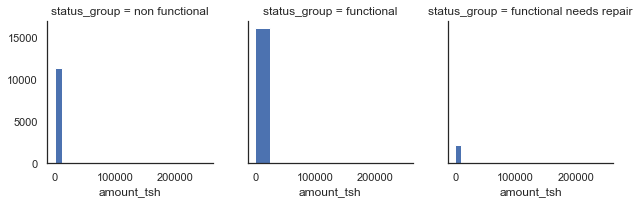

In [581]:
g = sns.FacetGrid(play_set_sample, col = 'status_group')
g.map(plt.hist, 'amount_tsh')

`date_recorded`: The date a data entered is not relevant to the status of a well.<br>
`funder`: Who found a well is less relevant than who installed a well. The former is more random but the latter can be an indicator for the quality of a well.<br>
`gps_height`: Heights can be a determinant of the status of a well. Will be looked at with longitude and latitude later.<br>
`Installer`: Different installer may determine the initial structure/hardware quality of a well. Several insights:<br>
- There are 1365 levels for `installer`. Need to be recategorized. Ideally keep the top 10 levels and convert the rest to 'others.'<br> 
- Level '0' could be mislabeled missing value. Should be converted to missing value.
- Missing values will have to be replaced by most frequent value.

In [500]:
play_set_sample['installer'].value_counts()

DWE                               8863
Government                         885
RWE                                606
Commu                              519
DANIDA                             514
KKKT                               441
0                                  421
Hesawa                             396
TCRS                               373
CES                                318
Central government                 318
HESAWA                             296
District Council                   272
DANID                              269
Community                          259
LGA                                212
World vision                       206
WEDECO                             197
Gover                              195
District council                   190
TASAF                              186
TWESA                              167
AMREF                              157
WU                                 150
Dmdd                               138
World Vision             

`longitude`: Important geographical information.<br>
`latitude`: Important geographical information.<br>
The following graphs combine `gps_height`, `longitude`, and `latitude`. It shows the geographical pattern of wells by its status.

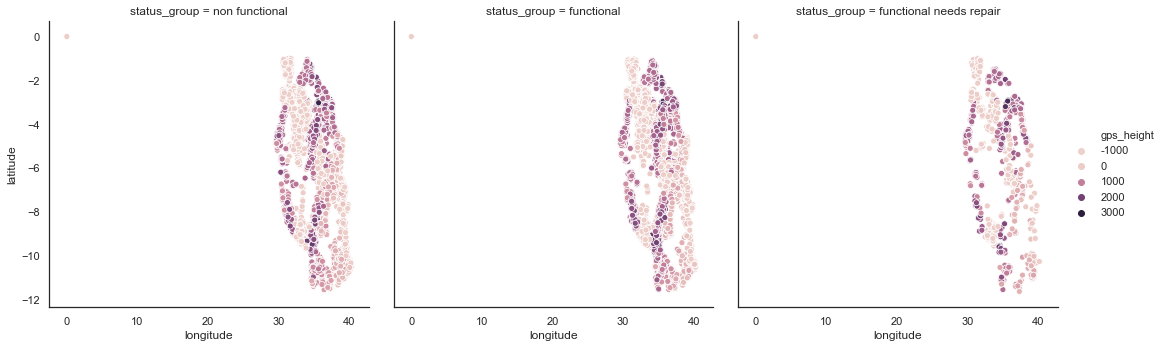

In [509]:
sns.set_style('white')
sns.relplot(x = 'longitude', y = 'latitude', hue = 'gps_height', col = 'status_group', 
            data = play_set_sample)

`wpt_name`: Not relevant to the status of a well. Will be dropped.<br>
`num_private`: No documetation of its meaning. Will be dropped.<br> 
`basin`: Important geographical information.<br>
`subvillage`: Geographical location of a well. Too detailed and too many levels, thus could be redundant. Will be dropped.<br>
`region`: Redundant geographical information since the `longitude` and `latitude` is provided. Will be dropped.<br>
`region_code`: Same with `region`.<br>
`district_code`: Same with `region`.<br>
`lga`: Same with `subvillage`. Will be dropped.<br>

In [520]:
play_set_sample['lga'].value_counts()

Njombe              1266
Moshi Rural          664
Arusha Rural         644
Kilosa               564
Rungwe               557
Bariadi              552
Kasulu               538
Mbozi                518
Kilombero            514
Singida Rural        486
Bagamoyo             466
Meru                 465
Kibondo              464
Kigoma Rural         428
Kahama               424
Kyela                421
Same                 414
Maswa                403
Magu                 397
Karagwe              370
Serengeti            361
Ulanga               359
Iringa Rural         358
Ngara                353
Namtumbo             349
Mbinga               343
Lushoto              341
Songea Rural         330
Mvomero              326
Hai                  325
                    ... 
Monduli              109
Kiteto               107
Newala               106
Rorya                104
Bahi                 104
Chato                102
Temeke                95
Tarime                94
Sikonge               92


`ward`: Same with `subvillage`. Will be dropped.

In [521]:
play_set_sample['ward'].value_counts()

Igosi               181
Siha Kati           125
Imalinyi            121
Kitunda             115
Mdandu              115
Msindo              110
Nduruma             108
Chanika             108
Mishamo             104
Usuka                94
Ngarenanyuki         87
Chalinze             87
Maji ya Chai         86
Maramba              78
Mtwango              77
Wanging'ombe         76
Mvomero              75
Vikindu              75
Kiranyi              75
Simbo                71
Masama Magharibi     70
Matola               70
Bugarama             69
Ifakara              69
Maposeni             67
Mlangali             67
Mahongole            67
Magomeni             66
Masama Mashariki     65
Isongole             64
                   ... 
Kafule                1
Msalato               1
Bugene                1
Ugunga                1
Maguu                 1
Vikumbulu             1
Bwembera              1
Ngasamo               1
Daraja Mbili          1
Kapilula              1
Jibondo         

`population`: Population will be related to whether a well is functional.<br>
`public_meeting`: No documentation of its meaning but several insights as below:<br>
- The plot shows the pattern of the status of a well differs by whether there is a public meeting.
- Missing values will be replaced by the most frequent value.

In [501]:
play_set_sample['public_meeting'].value_counts()

True     25559
False     2475
Name: public_meeting, dtype: int64

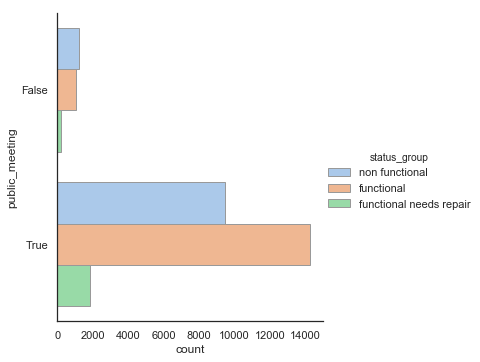

In [569]:
sns.catplot(y = "public_meeting", hue = "status_group", kind = "count", 
            palette = "pastel", edgecolor = ".6", data = play_set_sample)

`scheme_management`: Repetitive information with `management`. Will be dropped.

In [502]:
play_set_sample['scheme_management'].value_counts()

VWC                 18415
WUG                  2582
Water authority      1524
WUA                  1441
Water Board          1394
Parastatal            848
Private operator      560
Company               492
Other                 411
SWC                    47
Trust                  41
Name: scheme_management, dtype: int64

`permit`: whether a well is permitted may have relation to its status. Several insights as below:<br>
- The plot shows the pattern of the status of a well differs by whether a well is permitted.<br> 
- Missing values will be replaced by the most frequent value.<br>

In [503]:
play_set_sample['permit'].value_counts()

True     19446
False     8727
Name: permit, dtype: int64

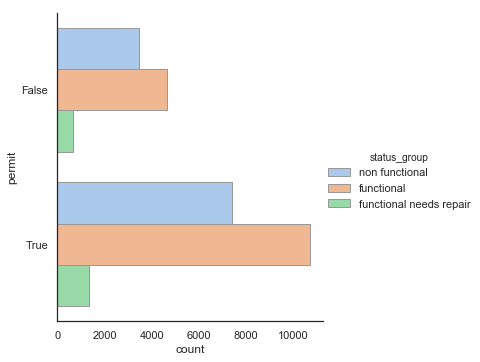

In [570]:
sns.catplot(y = "permit", hue = "status_group", kind = "count", 
            palette = "pastel", edgecolor = ".6", data = play_set_sample)

`scheme_name`: Too detailed and too many levels, thus could be redundant, especially we have information from `scheme_management`. Will be dropped.

In [522]:
play_set_sample['scheme_name'].value_counts()

K                                        351
None                                     322
Borehole                                 263
Chalinze wate                            197
M                                        188
DANIDA                                   162
Government                               147
Ngana water supplied scheme              144
wanging'ombe water supply s              134
wanging'ombe supply scheme               128
Uroki-Bomang'ombe water sup              117
Kirua kahe gravity water supply trust    111
I                                         97
Bagamoyo wate                             96
Machumba estate pipe line                 95
Kijiji                                    93
N                                         93
Handeni Trunk Main(H                      86
Losaa-Kia water supply                    82
S                                         81
Mkongoro Two                              76
mtwango water supply scheme               74
Roman     

`construction_year`: There is a group of wells that were constructed in year 0, which doesn't make sense. It is likely that they are mislabeled missing values. If consider those 0 as missing values and replace them by the median, the graph will make more sense.

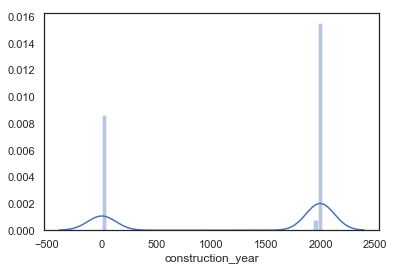

In [510]:
sns.distplot(play_set_sample['construction_year'], bins = 50)

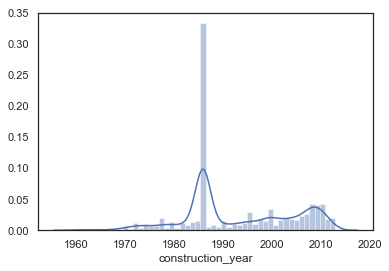

In [516]:
median_construction_year = play_set_sample['construction_year'].median()
play_set_sample = play_set_sample.replace({'construction_year': {0: median_construction_year}}) 
sns.distplot(play_set_sample['construction_year'], bins = 50)

For the following three features, only one will be selected since they all provide the same (or very similar) information.<br>
`extraction_type`: Raw information for extraction type. Too many levels and several levels only have minimal data points. Will be dropped.<br>
`extraction_type_group`: Same situation with `extraction_type`. Will be dropped.<br>
`extraction_type_class`: Rather clean. Will be used.<br>

In [524]:
play_set_sample['extraction_type'].value_counts()

gravity                      13387
nira/tanira                   4165
other                         3189
submersible                   2428
swn 80                        1859
mono                          1389
india mark ii                 1179
afridev                        889
ksb                            620
other - rope pump              234
other - swn 81                 103
windmill                        70
cemo                            56
other - play pump               44
india mark iii                  42
walimi                          27
climax                          18
other - mkulima/shinyanga        1
Name: extraction_type, dtype: int64

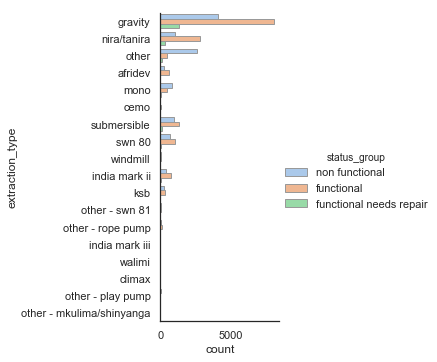

In [571]:
sns.catplot(y = "extraction_type", hue = "status_group", kind = "count", 
            palette = "pastel", edgecolor = ".6", data = play_set_sample)

In [526]:
play_set_sample['extraction_type_group'].value_counts()

gravity            13387
nira/tanira         4165
other               3189
submersible         3048
swn 80              1859
mono                1389
india mark ii       1179
afridev              889
rope pump            234
other handpump       175
other motorpump       74
wind-powered          70
india mark iii        42
Name: extraction_type_group, dtype: int64

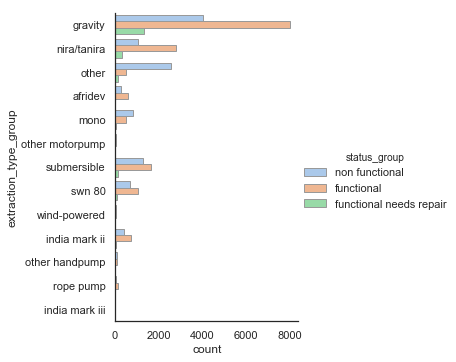

In [572]:
sns.catplot(y = "extraction_type_group", hue = "status_group", kind = "count", 
            palette = "pastel", edgecolor = ".6", data = play_set_sample)

In [527]:
play_set_sample['extraction_type_class'].value_counts()

gravity         13387
handpump         8309
other            3189
submersible      3048
motorpump        1463
rope pump         234
wind-powered       70
Name: extraction_type_class, dtype: int64

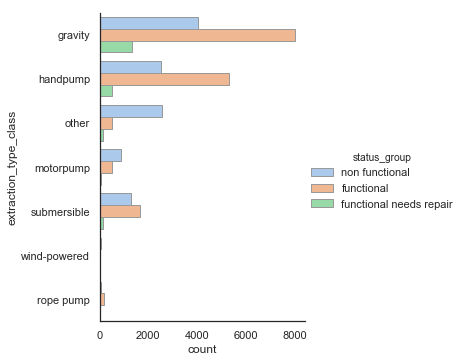

In [573]:
sns.catplot(y = "extraction_type_class", hue = "status_group", kind = "count", 
            palette = "pastel", edgecolor = ".6", data = play_set_sample)

For the following two features, only one will be selected since they both provide the same (or very similar) information.<br>
`management`: Compare to `management_group`, the information here is less informative. Will be dropped.<br>
`management_group`: Recategorized information for `management`. The categorization here is more informative and concise than `management`. Will be used.<br>

In [528]:
play_set_sample['management'].value_counts()

vwc                 20314
wug                  3237
water board          1531
wua                  1236
private operator      947
parastatal            908
water authority       437
other                 430
company               320
unknown               248
other - school         51
trust                  41
Name: management, dtype: int64

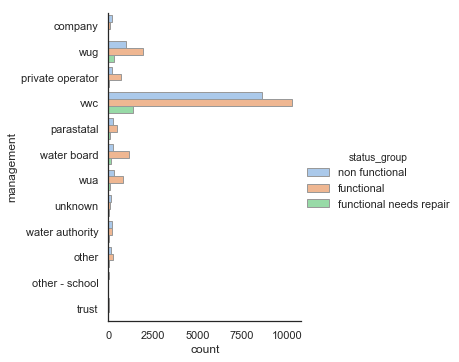

In [582]:
sns.catplot(y = "management", hue = "status_group", kind = "count", 
            palette = "pastel", edgecolor = ".6", data = play_set_sample)

In [529]:
play_set_sample['management_group'].value_counts()

user-group    26318
commercial     1745
parastatal      908
other           481
unknown         248
Name: management_group, dtype: int64

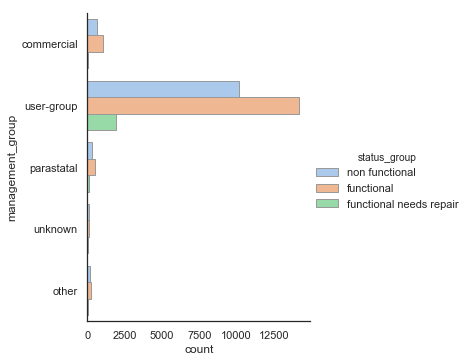

In [574]:
sns.catplot(y = "management_group", hue = "status_group", kind = "count", 
            palette = "pastel", edgecolor = ".6", data = play_set_sample)

The following two features provide essentially the same information but using different wordings. Only one will be kept.<br>
`payment`: Will be dropped.<br>
`payment_type`: Wordings are more concise. Will be used.<br>

In [530]:
play_set_sample['payment'].value_counts()

never pay                12718
pay per bucket            4506
pay monthly               4175
unknown                   4016
pay when scheme fails     1974
pay annually              1779
other                      532
Name: payment, dtype: int64

In [531]:
play_set_sample['payment_type'].value_counts()

never pay     12718
per bucket     4506
monthly        4175
unknown        4016
on failure     1974
annually       1779
other           532
Name: payment_type, dtype: int64

For the following two features, only one will be selected since they both provide the same (or very similar) information.<br>
`water_quality`: It has more detailed categories but not as informative as `quality_group` based on the graph. Will be dropped.<br>
`quality_group`: Recategorized information for `water_quality`. The categorization here is more informative and concise. Will be used.<br>

In [532]:
play_set_sample['water_quality'].value_counts()

soft                  25464
salty                  2435
unknown                 874
milky                   398
coloured                244
salty abandoned         173
fluoride                102
fluoride abandoned       10
Name: water_quality, dtype: int64

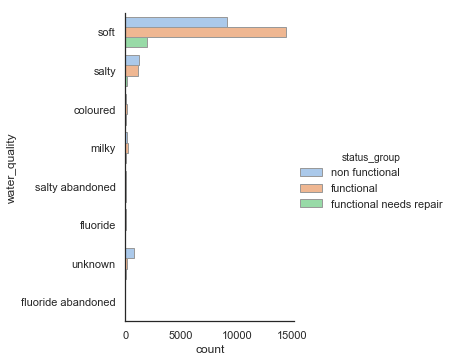

In [583]:
sns.catplot(y = "water_quality", hue = "status_group", kind = "count", 
            palette = "pastel", edgecolor = ".6", data = play_set_sample)

In [533]:
play_set_sample['quality_group'].value_counts()

good        25464
salty        2608
unknown       874
milky         398
colored       244
fluoride      112
Name: quality_group, dtype: int64

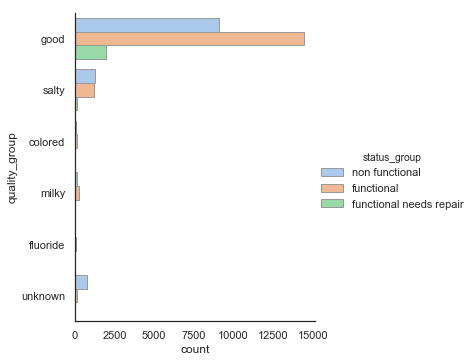

In [584]:
sns.catplot(y = "quality_group", hue = "status_group", kind = "count", 
            palette = "pastel", edgecolor = ".6", data = play_set_sample)

The following two features provide the same information. Only one will be kept.<br>
`quantity`: Will be used.<br>
`quantity_group`: Will be dropped.<br>

In [534]:
play_set_sample['quantity'].value_counts()

enough          16663
insufficient     7608
dry              3107
seasonal         1954
unknown           368
Name: quantity, dtype: int64

In [535]:
play_set_sample['quantity_group'].value_counts()

enough          16663
insufficient     7608
dry              3107
seasonal         1954
unknown           368
Name: quantity_group, dtype: int64

The following three features provide the very similar information:<br>
`source`: Raw information for source. It provides similar information with `source_type` but more levels. Will be dropped.<br>
`source_type`: Recategorized `source`. Will be used.<br>
`source_class`: Recategorized `source_type`. The new categories provide more information for `source_type`. Will be used.<br>

In [536]:
play_set_sample['source'].value_counts()

spring                  8502
shallow well            8489
machine dbh             5503
river                   4828
rainwater harvesting    1115
hand dtw                 453
lake                     394
dam                      274
other                    108
unknown                   34
Name: source, dtype: int64

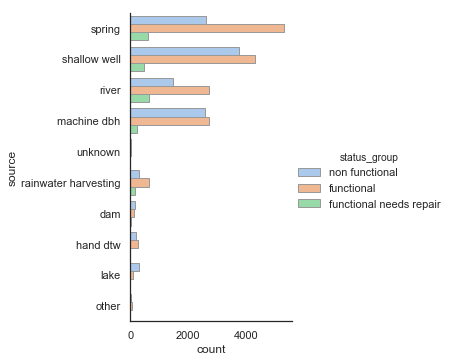

In [585]:
sns.catplot(y = "source", hue = "status_group", kind = "count", 
            palette = "pastel", edgecolor = ".6", data = play_set_sample)

In [538]:
play_set_sample['source_type'].value_counts()

spring                  8502
shallow well            8489
borehole                5956
river/lake              5222
rainwater harvesting    1115
dam                      274
other                    142
Name: source_type, dtype: int64

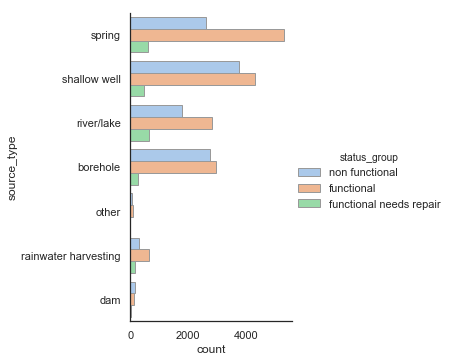

In [586]:
sns.catplot(y = "source_type", hue = "status_group", kind = "count", 
            palette = "pastel", edgecolor = ".6", data = play_set_sample)

In [537]:
play_set_sample['source_class'].value_counts()

groundwater    22947
surface         6611
unknown          142
Name: source_class, dtype: int64

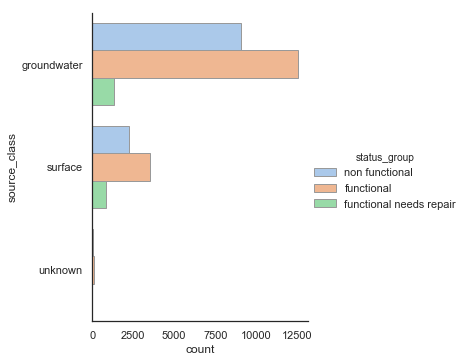

In [587]:
sns.catplot(y = "source_class", hue = "status_group", kind = "count", 
            palette = "pastel", edgecolor = ".6", data = play_set_sample)

For the following two features, only one will be selected since they both provide very similar information.<br>
`waterpoint_type`: It has one more category than `waterpoint_type_group` but not as informative based on the graph. Will be dropped.<br>
`waterpoint_type_group`: Will be used.<br>

In [539]:
play_set_sample['waterpoint_type'].value_counts()

communal standpipe             14226
hand pump                       8819
other                           3143
communal standpipe multiple     3031
improved spring                  421
cattle trough                     59
dam                                1
Name: waterpoint_type, dtype: int64

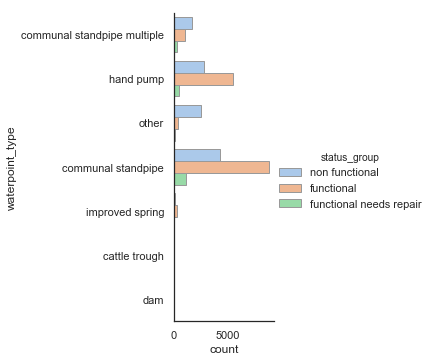

In [588]:
sns.catplot(y = "waterpoint_type", hue = "status_group", kind = "count", 
            palette = "pastel", edgecolor = ".6", data = play_set_sample)

In [541]:
play_set_sample['waterpoint_type_group'].value_counts()

communal standpipe    17257
hand pump              8819
other                  3143
improved spring         421
cattle trough            59
dam                       1
Name: waterpoint_type_group, dtype: int64

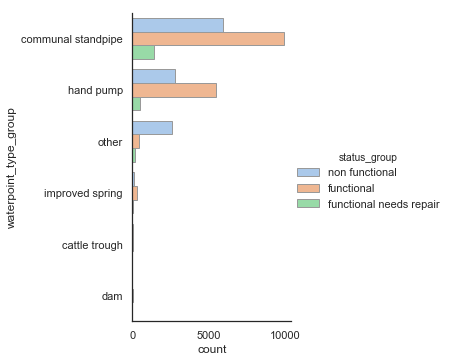

In [589]:
sns.catplot(y = "waterpoint_type_group", hue = "status_group", kind = "count", 
            palette = "pastel", edgecolor = ".6", data = play_set_sample)

# Summary
## Feature Selection
The following features will be dropped:<br>
`id`, `date_recorded`, `funder`, `wpt_name`, `num_private`, `subvillage`, `region`, `region_code`, `district_code`, `lga`, `ward`, `scheme_management`, `recorded_by`, `scheme_name`, `extraction_type`, `extraction_type_group`, `payment`, `water_quality`, `quantity_group`, `source`, `waterpoint_type`.<br>
## Missing Data
Numerical features: Impute median for missing data. `Year` has value 0 that should be considered as missing data.<br>
Categorical features: Impute the most frequent value for missing data. `installer`, `public_meeting`, and `permit` are the categorical features with missing data.<br>
## Feature Engineering
`installer` has too many levels and it needs to be reengineered. Level '0' should be considered as missing value. Aim to keep top 10 most frequent levels and recategorize the rest of the levels to 'others.'<br>